<h1>Лабораторная работа №4</h1>
<h2>Шамилбек Арслан</h2>
<h2>WIN-1-21</h2>
<h2>Работа с классификацией данных при помощи scikit-learn. Построение модели машинного обучения методом k-средних</h2>

In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>1. Оптическое распознавание набора данных рукописных цифр</h3>

In [2]:
digits_dataset = load_digits()

<h4>Размерность датасета</h4>

In [3]:
print(digits_dataset['data'].shape)

(1797, 64)


<h4>Краткое описание</h4>

In [4]:
print(digits_dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<h4>Список признаков</h4>

In [5]:
print(digits_dataset['feature_names'])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


<h4>Список предсказываемых цифр</h4>

In [6]:
print(digits_dataset['target_names'])

[0 1 2 3 4 5 6 7 8 9]


<h4>Первые 10 строк датасета</h4>

In [7]:
print(digits_dataset['data'][:5])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

<h4>Визуализация данных датасета</h4>

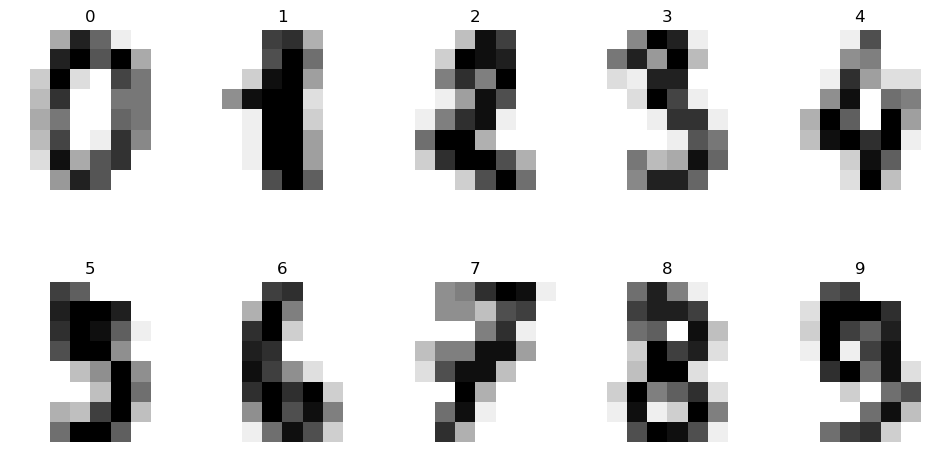

In [8]:
images_and_labels = list(zip(digits_dataset['images'], digits_dataset['target']))

plt.figure(figsize=(12, 6))
for index, (image, label) in enumerate(images_and_labels[0:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)

plt.show()

<h4>Классовое распределение чисел датасета</h4>

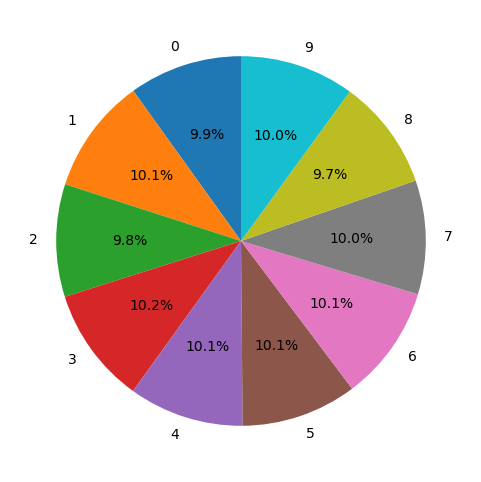

In [9]:
class_labels, class_counts = zip(*sorted(
    zip(digits_dataset['target_names'], [sum(digits_dataset['target'] == i) for i in digits_dataset['target_names']])))

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.show()

<h4>Частота и интенсивность пикселей (0-16)</h4>

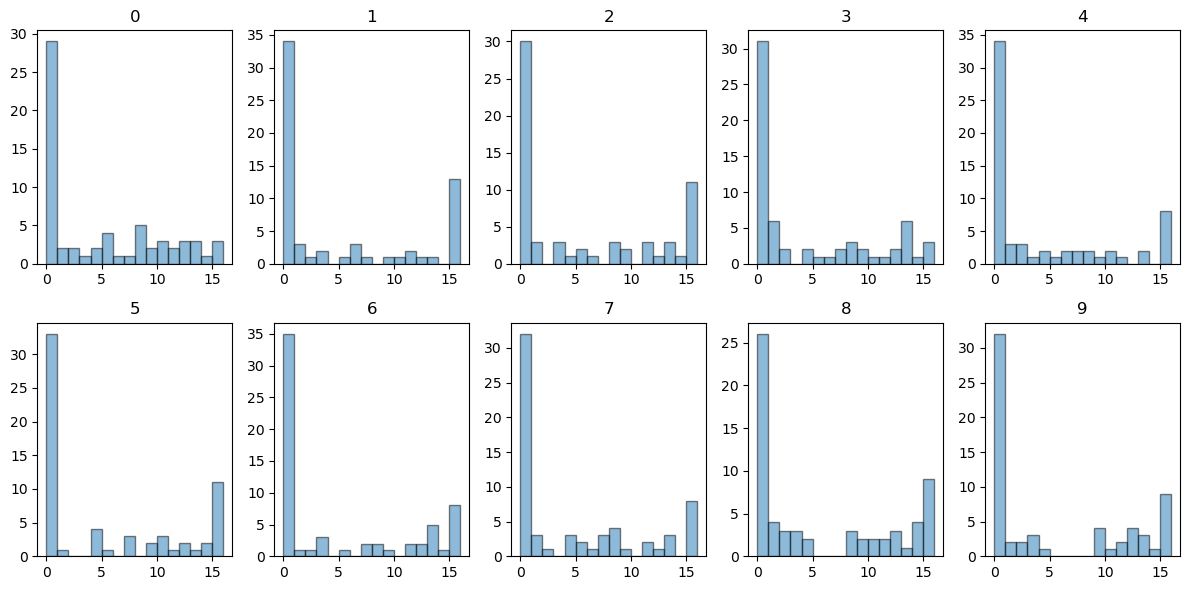

In [10]:
num_bins = 16

figure, axis = plt.subplots(2, 5, figsize=(12, 6))

for digit in range(10):
    filtered_data = digits_dataset['images'][digits_dataset['target'] == digit]

    pixel_values = filtered_data.reshape(filtered_data.shape[0], -1)
    
    row = digit // 5
    column = digit % 5
    
    axis[row, column].hist(pixel_values[0], bins=num_bins, range=(0, 16), edgecolor='k', alpha=0.5)
    axis[row, column].set_title(digit)

plt.tight_layout()
plt.show()

<h4>Разбиение датасета на обучающий и тестовый наборы</h4>

In [11]:
X_training, X_testing, y_training, y_testing = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=10)

<h4>Построение модели методом k-ближайших средних</h4>

In [12]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_training, y_training)

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_training, y_training)

knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_training, y_training)

knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=8)

<h4>Оценка качества модели</h4>

In [13]:
print('Точность результатов на тестовом наборе (n_neighbors = 1): ' + str(knn1.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 2): ' + str(knn2.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 4): ' + str(knn4.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 8): ' + str(knn8.score(X_testing, y_testing)))

Точность результатов на тестовом наборе (n_neighbors = 1): 0.9888888888888889
Точность результатов на тестовом наборе (n_neighbors = 2): 0.9866666666666667
Точность результатов на тестовом наборе (n_neighbors = 4): 0.9866666666666667
Точность результатов на тестовом наборе (n_neighbors = 8): 0.9844444444444445


<p>
    Данный датасет содержит равное количество элементов каждого из предсказываемых классов, а также, если взглянуть на гистограмму частоты и
    интенсивности пикселей, можно заметить характерный паттерн соответствующий каждой цифре. Наибольший процент правильных ответов был достигнут
    при числе соседей равном 1 и их увеличение не улучшило результат. Модель, построенная методом k-ближайших средних, показала хороший результат
    и способна предсказывать результаты с высокой (98.8%) точностью.
</p>

<h3>2. Набор данных по распознаванию вин</h3>

In [14]:
wine_dataset = load_wine()

<h4>Размерность датасета</h4>

In [15]:
print(wine_dataset['data'].shape)

(178, 13)


<h4>Краткое описание</h4>

In [16]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

<h4>Список признаков</h4>

In [17]:
print(wine_dataset['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<h4>Список предсказываемых сортов вина</h4>

In [18]:
print(wine_dataset['target_names'])

['class_0' 'class_1' 'class_2']


<h4>Первые 10 строк датасета</h4>

In [19]:
print(wine_dataset['data'][:10])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.6

<h4>Классовое распределение сортов вин датасета</h4>

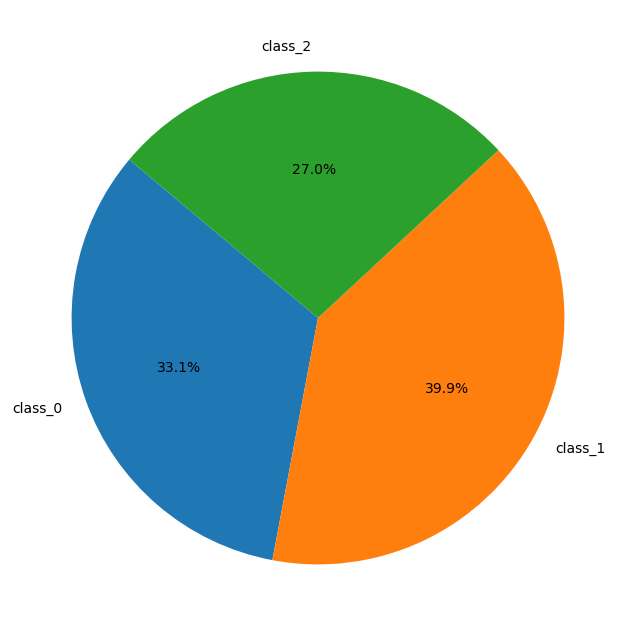

In [20]:
class_labels, class_counts = zip(*sorted(
    zip(wine_dataset['target_names'], [sum(wine_dataset['target'] == i) for i in range(len(wine_dataset['target_names']))])))

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.show()

<h4>Распределение признаков каждого сорта вина</h4>

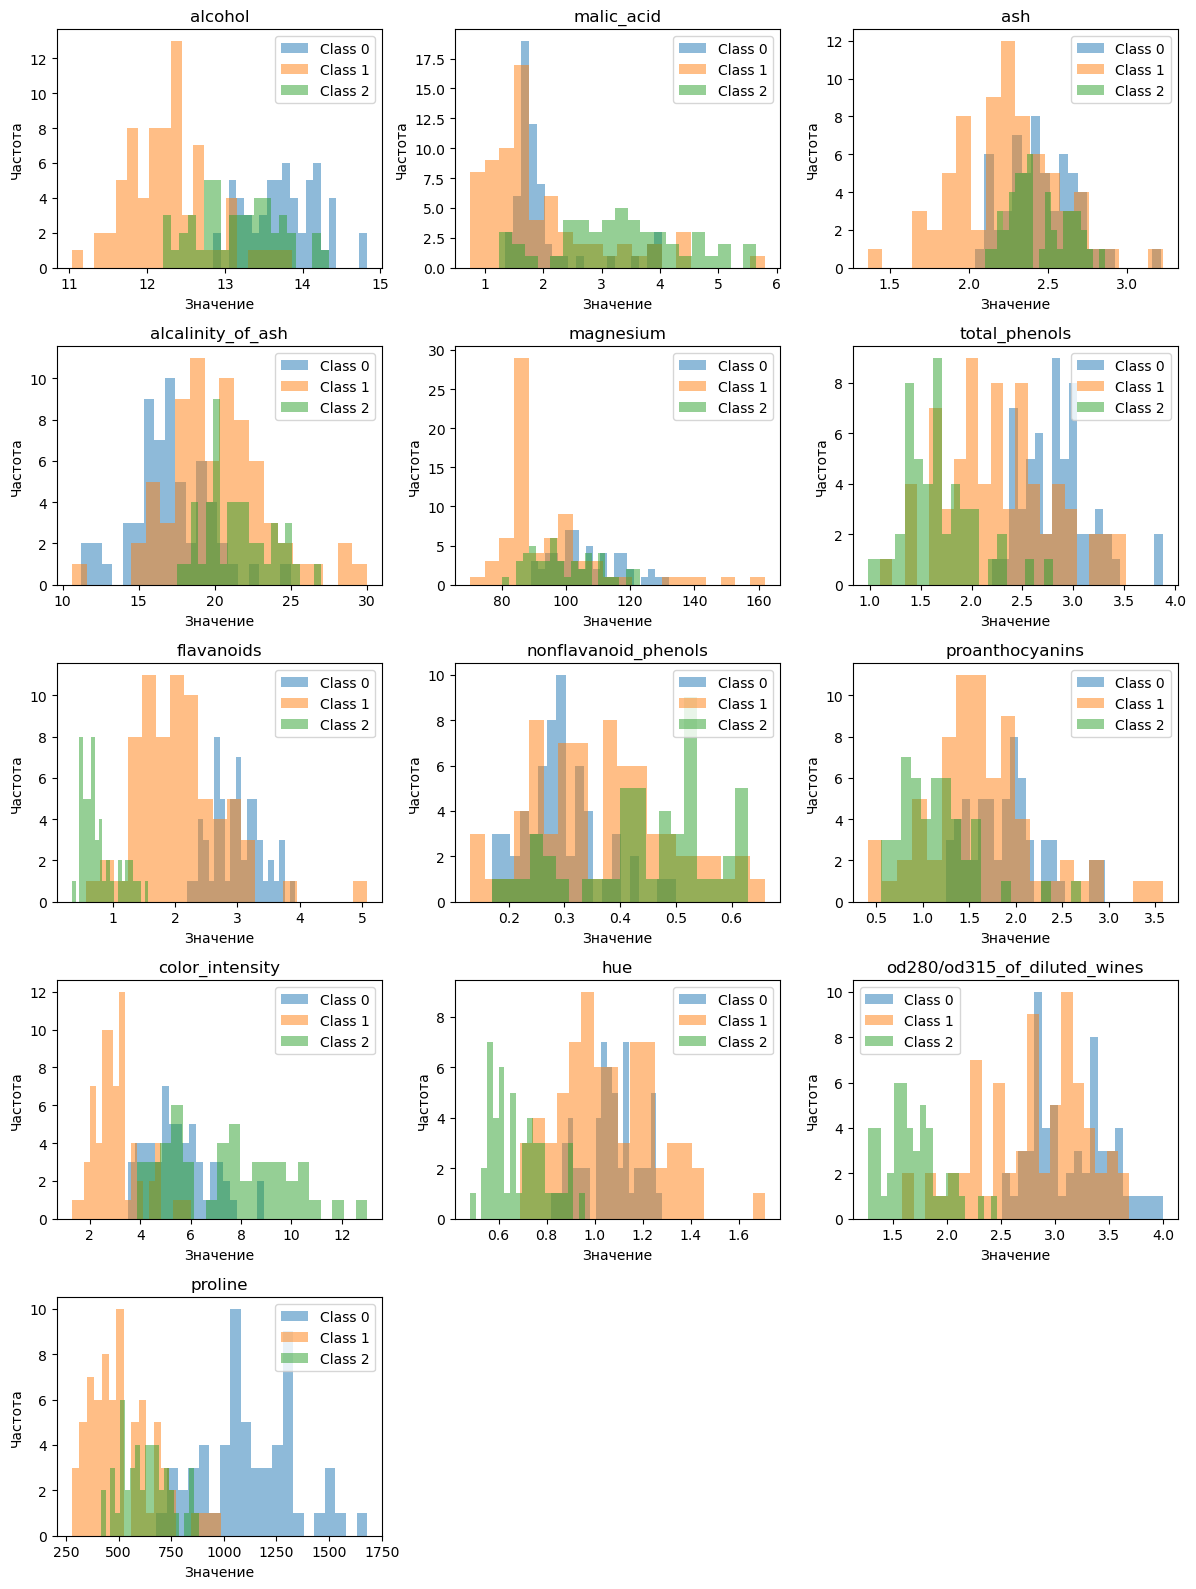

In [21]:
wine_df = pd.DataFrame(data=wine_dataset['data'], columns=wine_dataset['feature_names'])
wine_df['class'] = wine_dataset['target']

unique_classes = wine_df['class'].unique()

plt.figure(figsize=(12, 16))
for i, feature in enumerate(wine_dataset['feature_names']):
    plt.subplot(5, 3, i + 1)
    plt.title(feature)
    
    for wine_class in unique_classes:
        class_data = wine_df[wine_df['class'] == wine_class][feature]
        plt.hist(class_data, bins=20, alpha=0.5, label='Class ' + str(wine_class))
        
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    
plt.tight_layout()
plt.show()

<h4>Разбиение датасета на обучающий и тестовый наборы</h4>

In [22]:
X_training, X_testing, y_training, y_testing = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=10)

<h4>Построение модели методом k-ближайших средних</h4>

In [23]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_training, y_training)

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_training, y_training)

knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_training, y_training)

knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=8)

<h4>Оценка качества модели</h4>

In [24]:
print('Точность результатов на тестовом наборе (n_neighbors = 1): ' + str(knn1.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 2): ' + str(knn2.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 4): ' + str(knn4.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 8): ' + str(knn8.score(X_testing, y_testing)))

Точность результатов на тестовом наборе (n_neighbors = 1): 0.6666666666666666
Точность результатов на тестовом наборе (n_neighbors = 2): 0.5777777777777777
Точность результатов на тестовом наборе (n_neighbors = 4): 0.7333333333333333
Точность результатов на тестовом наборе (n_neighbors = 8): 0.6


<p>
    Модель показала наилучший результат (73.3%) при числе соседей равном 4. Можно предположить, что это связано в первую очередь с малым количеством
    данных в датасете (178 примеров). Также на диаграмме классового распределения сортов вина видно, что экземпляров класса 1 больше на ~10%, чем
    экземпляров других классов. Увеличение числа соседей также не улучшает результативность модели. Таким образом, модель, постороенная методом
    k-ближайших средних, предсказывает результаты с невысокой точностью и данный метод плохо подходит для выбранного датасета.
</p>

<h3>3. Набор данных по раку груди висконсин (диагностический)</h3>

In [25]:
breast_cancer_dataset = load_breast_cancer()

<h4>Размерность датасета</h4>

In [26]:
print(breast_cancer_dataset['data'].shape)

(569, 30)


<h4>Краткое описание</h4>

In [27]:
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<h4>Список признаков</h4>

In [28]:
print(breast_cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<h4>Список предсказываемых значений</h4>

In [29]:
print(breast_cancer_dataset['target_names'])

['malignant' 'benign']


<h4>Первые 10 строк датасета</h4>

In [30]:
print(breast_cancer_dataset['data'][0:10])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

<h4>Классовое распределение</h4>

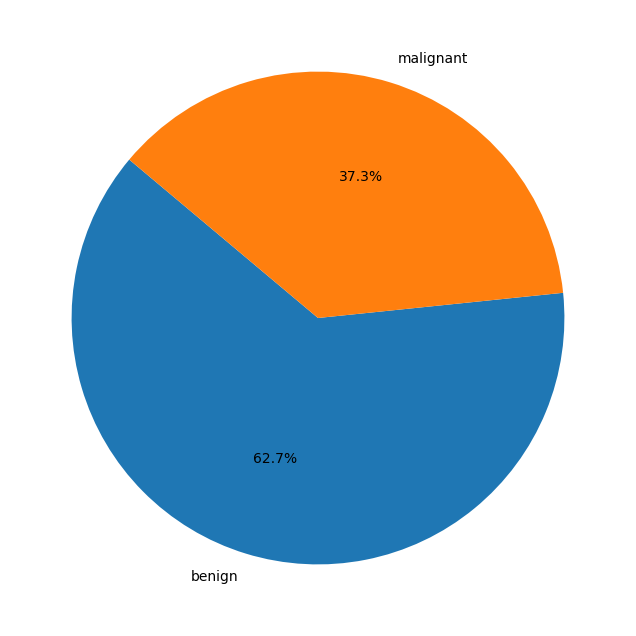

In [31]:
class_labels, class_counts = zip(*sorted(
    zip(breast_cancer_dataset['target_names'], [sum(breast_cancer_dataset['target'] == i) for i in range(len(breast_cancer_dataset['target_names']))])))

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.show()

<h4>Распределение признаков каждого вида рака груди висконсин</h4>

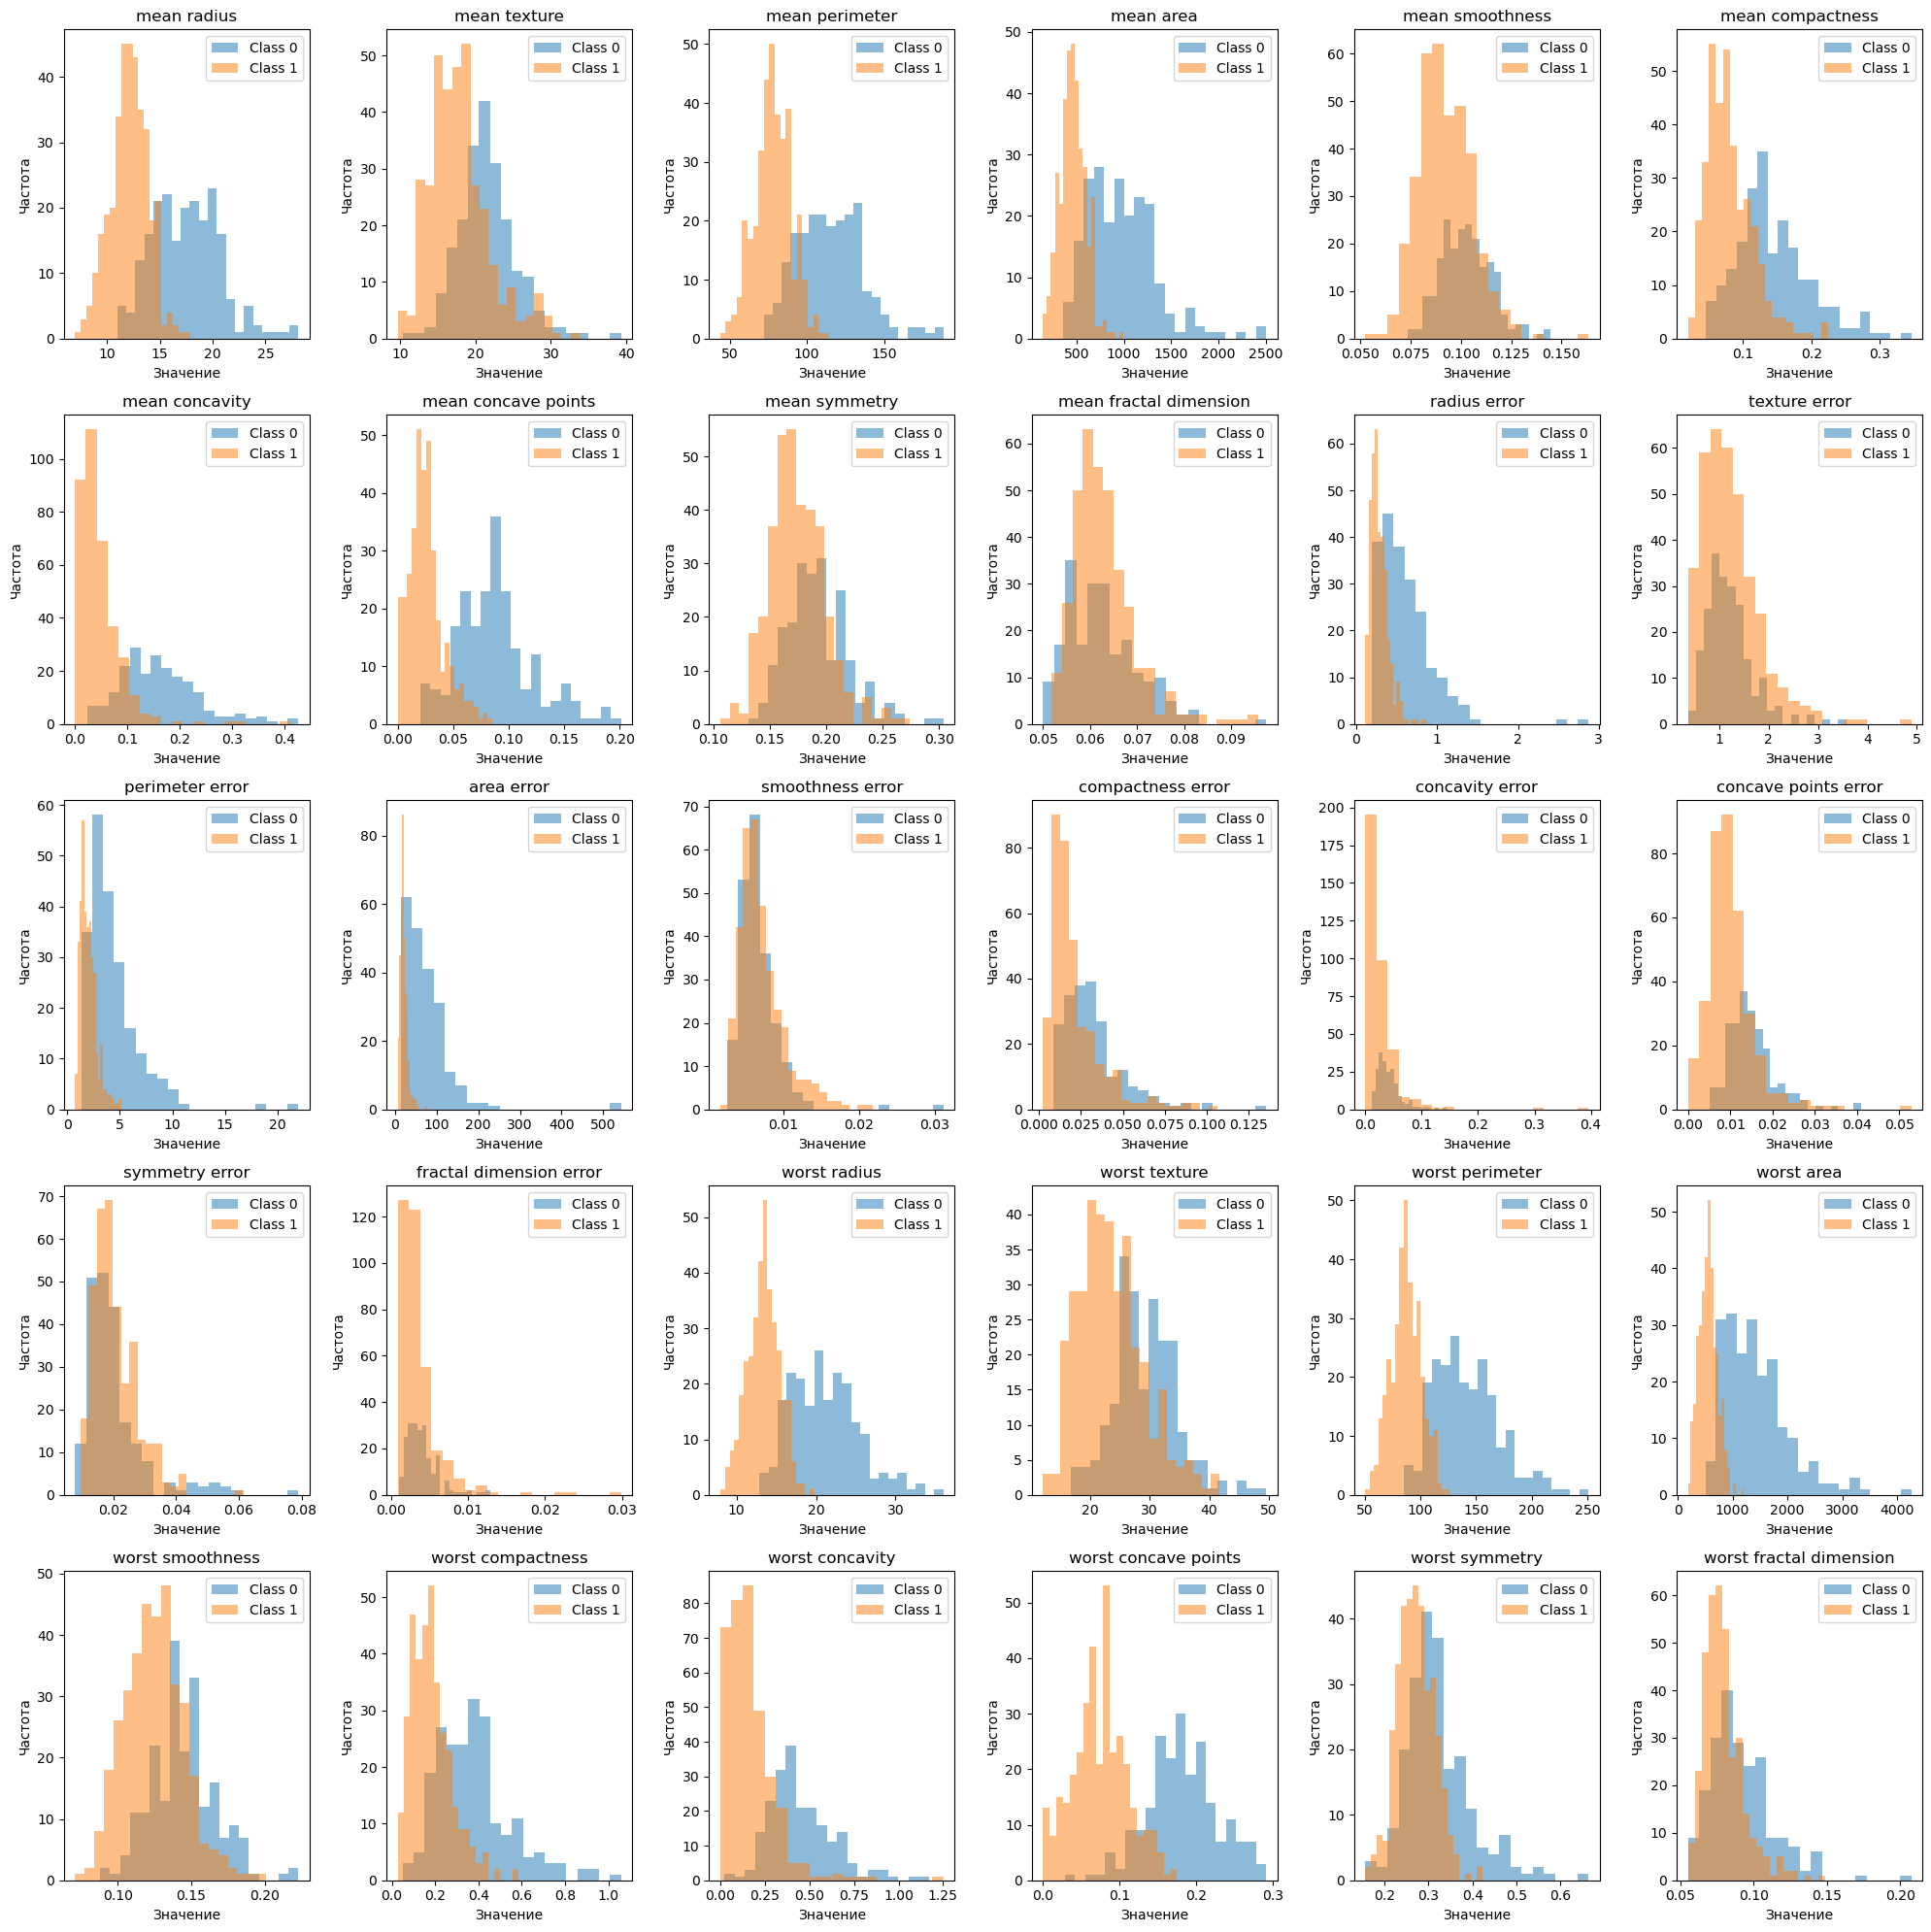

In [38]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_dataset['data'], columns=breast_cancer_dataset['feature_names'])
breast_cancer_df['class'] = breast_cancer_dataset['target']

unique_classes = breast_cancer_df['class'].unique()

plt.figure(figsize=(20, 20))
for i, feature in enumerate(breast_cancer_dataset['feature_names']):
    plt.subplot(5, 6, i + 1)
    plt.title(feature)
    
    for breast_cancer_class in unique_classes:
        class_data = breast_cancer_df[breast_cancer_df['class'] == breast_cancer_class][feature]
        plt.hist(class_data, bins=20, alpha=0.5, label='Class ' + str(breast_cancer_class))
        
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    
plt.tight_layout()
plt.show()

<h4>Разбиение датасета на обучающий и тестовый наборы</h4>

In [33]:
X_training, X_testing, y_training, y_testing = train_test_split(breast_cancer_dataset['data'], breast_cancer_dataset['target'], random_state=10)

<h4>Построение модели методом k-ближайших средних</h4>

In [36]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_training, y_training)

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_training, y_training)

knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_training, y_training)

knn8 = KNeighborsClassifier(n_neighbors=8)
knn8.fit(X_training, y_training)

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=10)

<h4>Оценка качества модели</h4>

In [37]:
print('Точность результатов на тестовом наборе (n_neighbors = 1): ' + str(knn1.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 2): ' + str(knn2.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 4): ' + str(knn4.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 8): ' + str(knn8.score(X_testing, y_testing)))
print('Точность результатов на тестовом наборе (n_neighbors = 10): ' + str(knn10.score(X_testing, y_testing)))

Точность результатов на тестовом наборе (n_neighbors = 1): 0.9230769230769231
Точность результатов на тестовом наборе (n_neighbors = 2): 0.9090909090909091
Точность результатов на тестовом наборе (n_neighbors = 4): 0.9230769230769231
Точность результатов на тестовом наборе (n_neighbors = 8): 0.9300699300699301
Точность результатов на тестовом наборе (n_neighbors = 10): 0.9300699300699301


<p>
    Из результатов видно, что модель предказывет результы с наилучшей точность при числе соседей равном или большем 8. Погрешность может быть связана
    с перевесом данных (62.7%) класса доброкачественных диагнозов (benign). Также на некоторых графиках распределения признаков (например 
    smoothness error, symmetry error, worst, symmetry) можно заметить, что оба класса имеют схожий диапазон значений. Стоит также упомянуть, что на
    некоторых графиках (например mean smoothness, texture error, concaviry error) диапазон значений одного класса полность включает в себя диапазон 
    значений другого класса. Эти факторы могли повлиять на итоговую результативность модели.
</p>